<a href="https://colab.research.google.com/github/rafiff18/2025_Pengolahan_Citra-_TI-2B/blob/main/js_minggu_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* nama  :Muhammad Rafif Pasya
* kelas : TI-2B
*  NIM   : 4.33.23.1.18


JOOBSHEET MINGGU 1


P1

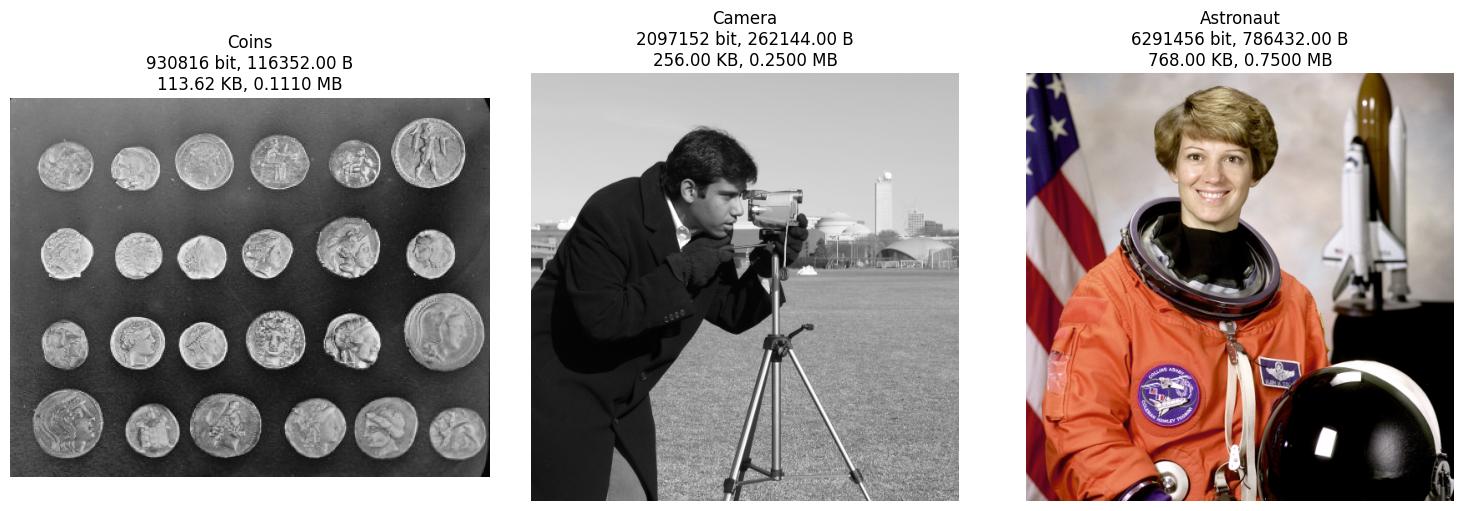

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar
gambar_coins = data.coins()
gambar_camera  = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam berbagai satuan
def hitung_ukuran(image):
    bit_per_pixel = 8 if len(image.shape) == 2 else 24  # Grayscale = 8 bit, RGB = 24 bit
    total_pixels = image.shape[0] * image.shape[1]
    total_bits = total_pixels * bit_per_pixel
    total_bytes = total_bits / 8
    total_kb = total_bytes / 1024
    total_mb = total_kb / 1024
    return total_bits, total_bytes, total_kb, total_mb

# Menyusun gambar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Menampilkan gambar dan informasinya
for ax, img, nama in zip(axes, gambar_list, nama_list):
    bits, bytes_, kb, mb = hitung_ukuran(img)
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)  # Sesuai warna gambar
    ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
    ax.axis('off')

plt.tight_layout()
plt.show()


p2

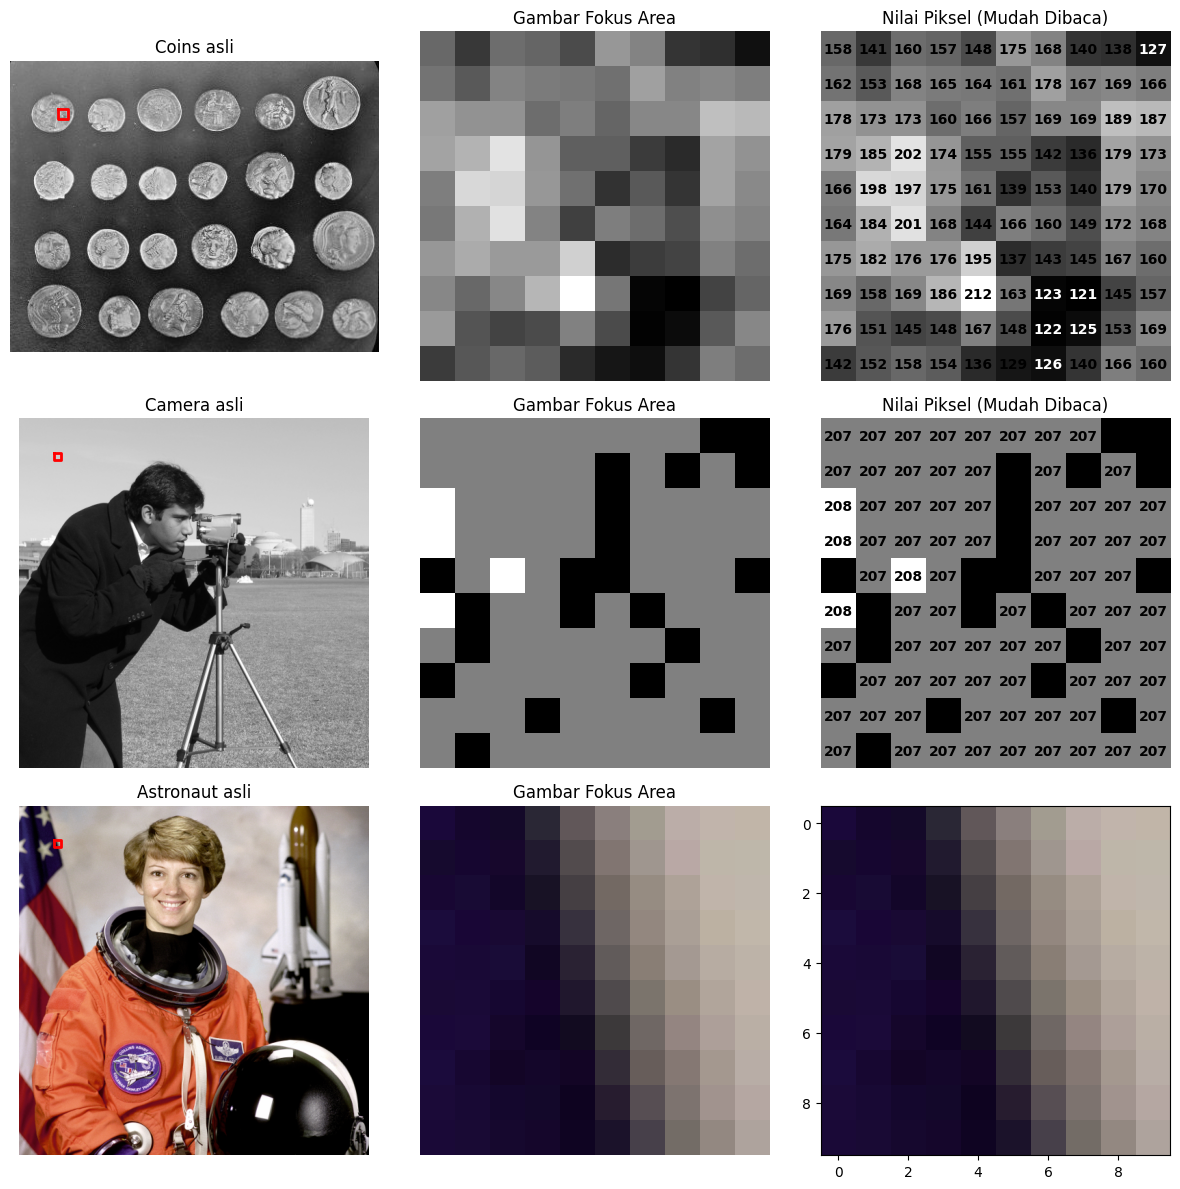

In [15]:
fig , axes = plt.subplots (3,3, figsize= (12,12))

#list gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

#koordinat area kecil yang di zoom
x_start ,  x_end = 50, 60
y_start , y_end = 50, 60

for i , (img,nama) in enumerate(zip(gambar_list, nama_list)):
  #gambar asli
  axes [i,0].imshow(img,cmap='gray' if len(img.shape) == 2 else None)
  axes [i,0].set_title(f"{nama} asli")
  axes [i,0].axis('off')

  #ta,mbahkan kotak merah untuk area di fokuskan
  rect_x = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

  #gambar fokus area
  zoomed_img = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1].axis('off')

  #menampilkan nilai pixel
  axes[i ,2].imshow(zoomed_img , cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

  for y in range(zoomed_img.shape[0]):
    for x in range(zoomed_img.shape[1]):
      if len(img.shape) == 3: # Jika RGB, ambil nilai rata-rata piksel untuk tampilan angka
        pixel_value = np.mean(zoomed_img[y, x]).astype(int)
      else :
        pixel_value = zoomed_img[y, x]

        #pilih warna teks agar mudah dibaca
        text_color = "white" if pixel_value < 128 else "black"
        axes[i, 2].text(x, y, str(pixel_value), color=text_color,ha='center', va='center', fontsize=10, fontweight='bold')

        axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
